# **import data**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier


In [5]:
import pandas as pd

# Load the dataset (adjust the path if needed)
df = pd.read_csv('/content/churn.csv')




In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **initial analysis**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df.duplicated().sum()

0

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# **EDA and visualisation**

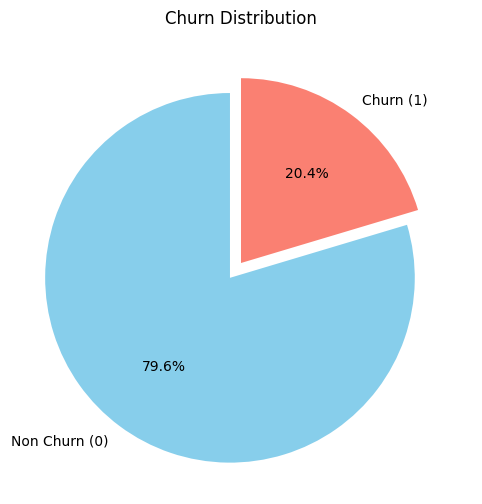

In [12]:
# Calculate churn distribution
churn_counts = df['Exited'].value_counts(normalize=True) * 100

# Plot the pie chart with updated labels
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=['Non Churn (0)', 'Churn (1)'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, explode=(0.1, 0))
plt.title('Churn Distribution')
plt.show()

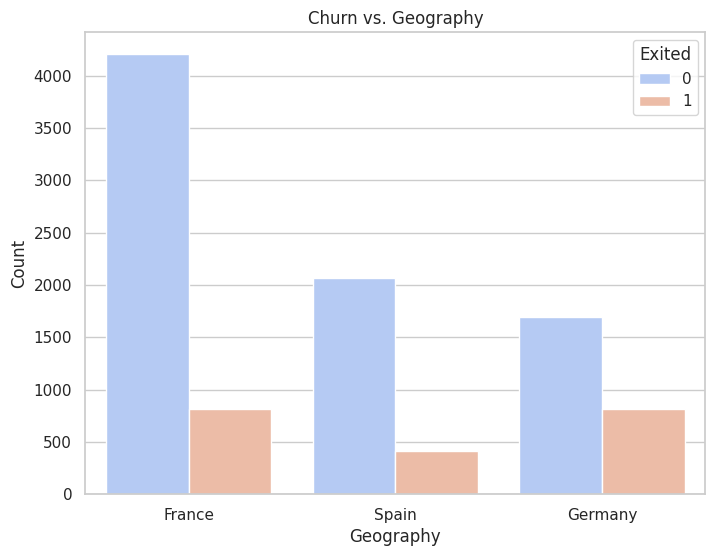

In [15]:
# Set the plot style
sns.set(style="whitegrid")

# 1. Bar plot for Geography
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography', hue='Exited', palette='coolwarm')
plt.title('Churn vs. Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

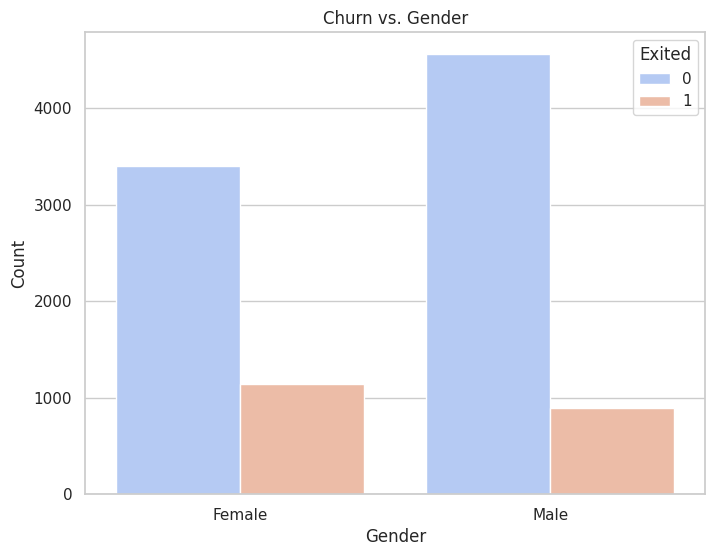

In [16]:
# 2. Bar plot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Exited', palette='coolwarm')
plt.title('Churn vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

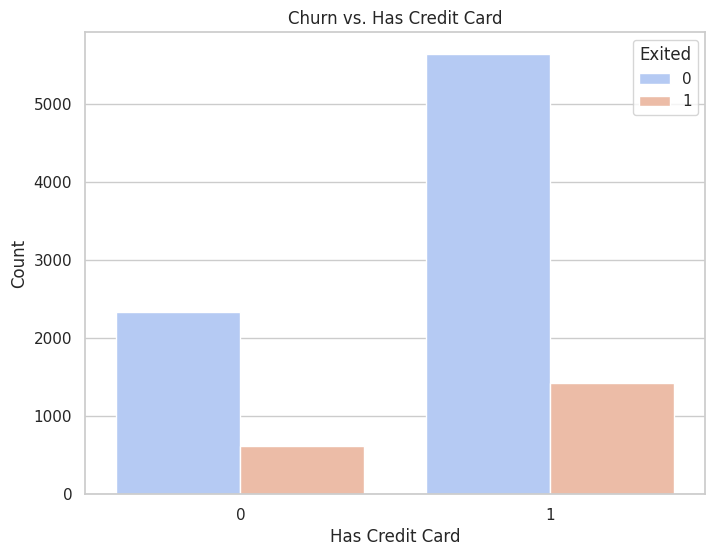

In [17]:
# 3. Count plot for HasCrCard (Credit Card)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HasCrCard', hue='Exited', palette='coolwarm')
plt.title('Churn vs. Has Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()


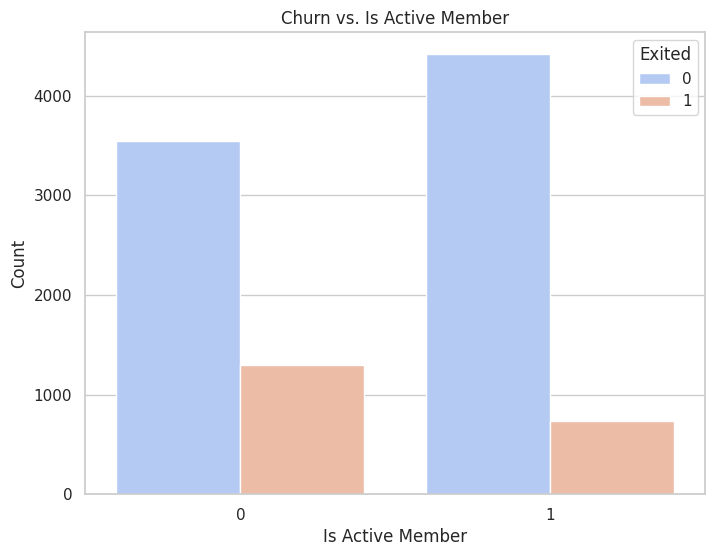

In [18]:
# 4. Count plot for IsActiveMember
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette='coolwarm')
plt.title('Churn vs. Is Active Member')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

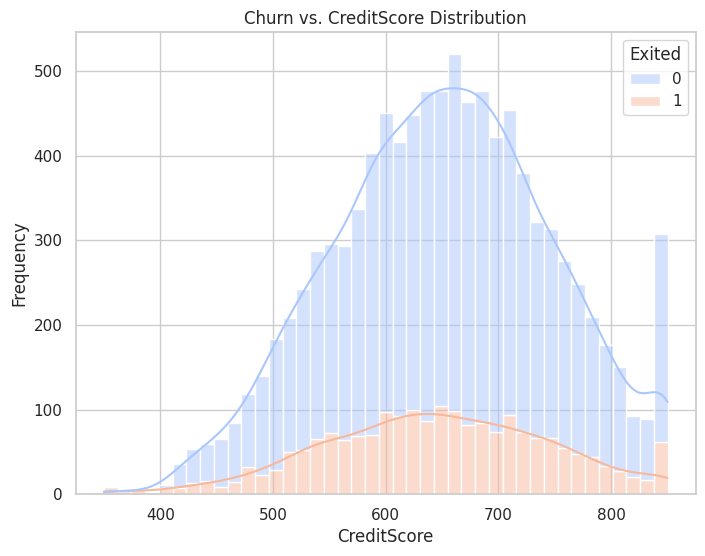

In [20]:
# 1. Histplot for CreditScore
plt.figure(figsize=(8, 6))
sns.histplot(df, x='CreditScore', hue='Exited', multiple='stack', palette='coolwarm', kde=True)
plt.title('Churn vs. CreditScore Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()




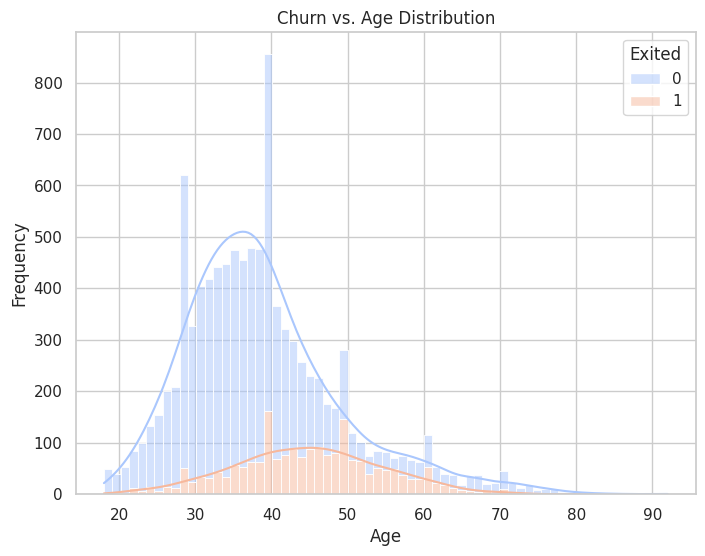

In [21]:
# 2. Histplot for Age
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', palette='coolwarm', kde=True)
plt.title('Churn vs. Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

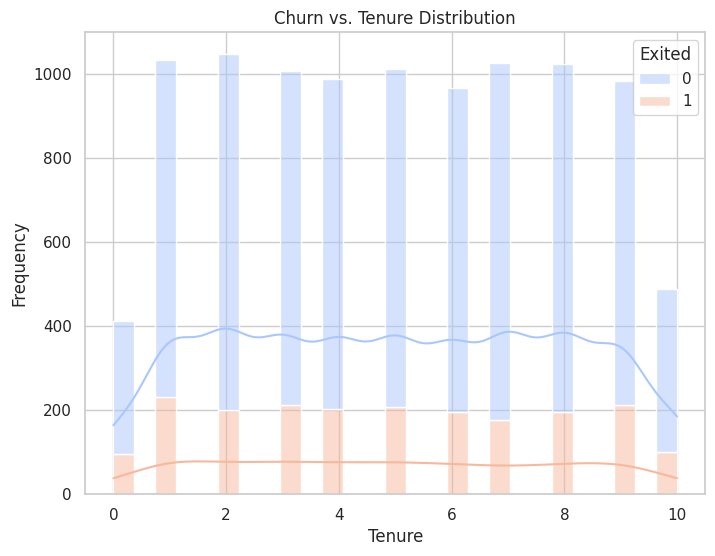

In [22]:
# 3. Histplot for Tenure
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Tenure', hue='Exited', multiple='stack', palette='coolwarm', kde=True)
plt.title('Churn vs. Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

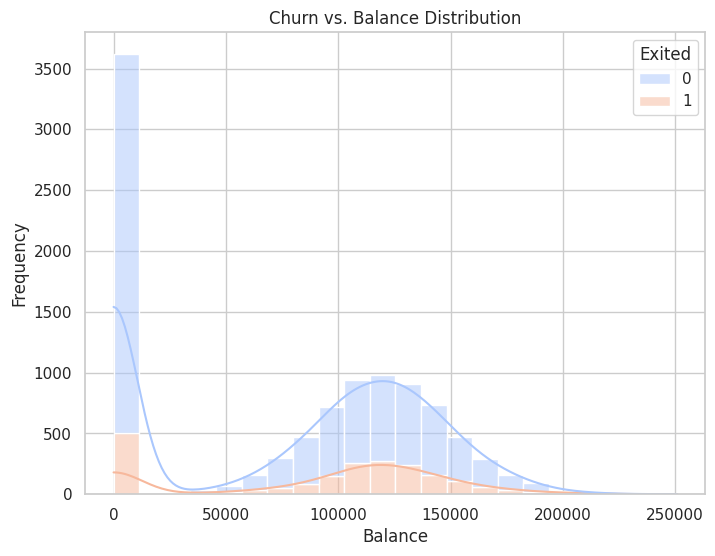

In [23]:
# 4. Histplot for Balance
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Balance', hue='Exited', multiple='stack', palette='coolwarm', kde=True)
plt.title('Churn vs. Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

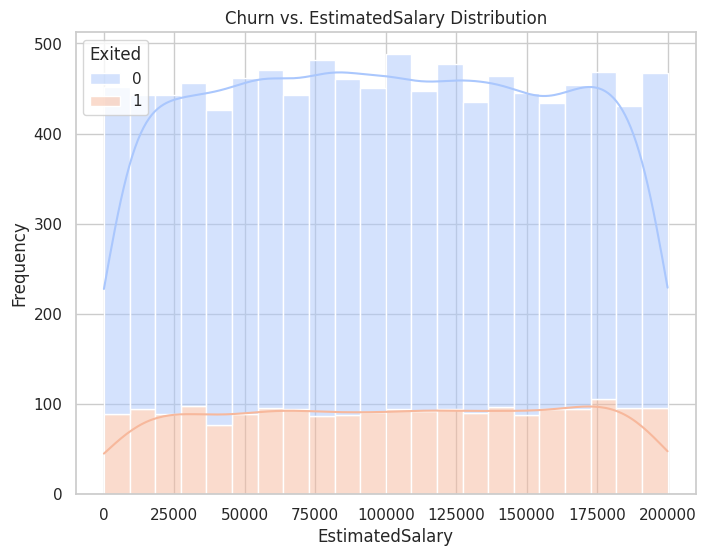

In [24]:
# 5. Histplot for EstimatedSalary
plt.figure(figsize=(8, 6))
sns.histplot(df, x='EstimatedSalary', hue='Exited', multiple='stack', palette='coolwarm', kde=True)
plt.title('Churn vs. EstimatedSalary Distribution')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

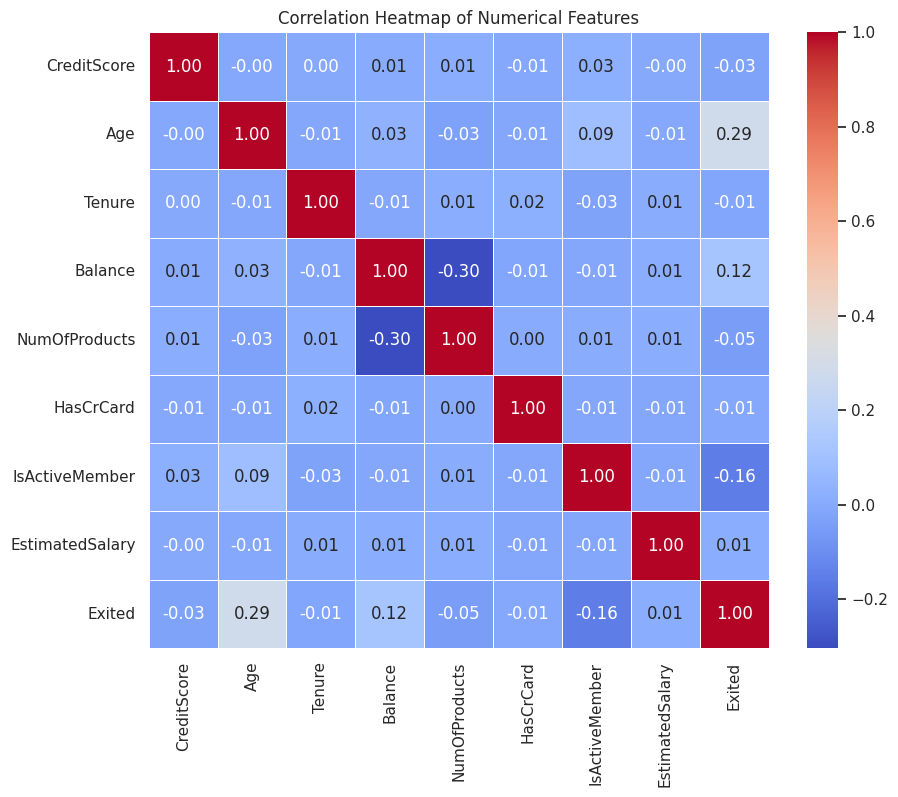

In [26]:
# Drop specific columns
df_cleaned = df.drop(columns=['Surname', 'CustomerId', 'RowNumber', 'Geography'])

# Select only numerical columns for correlation
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Set the plot size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Title and labels
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

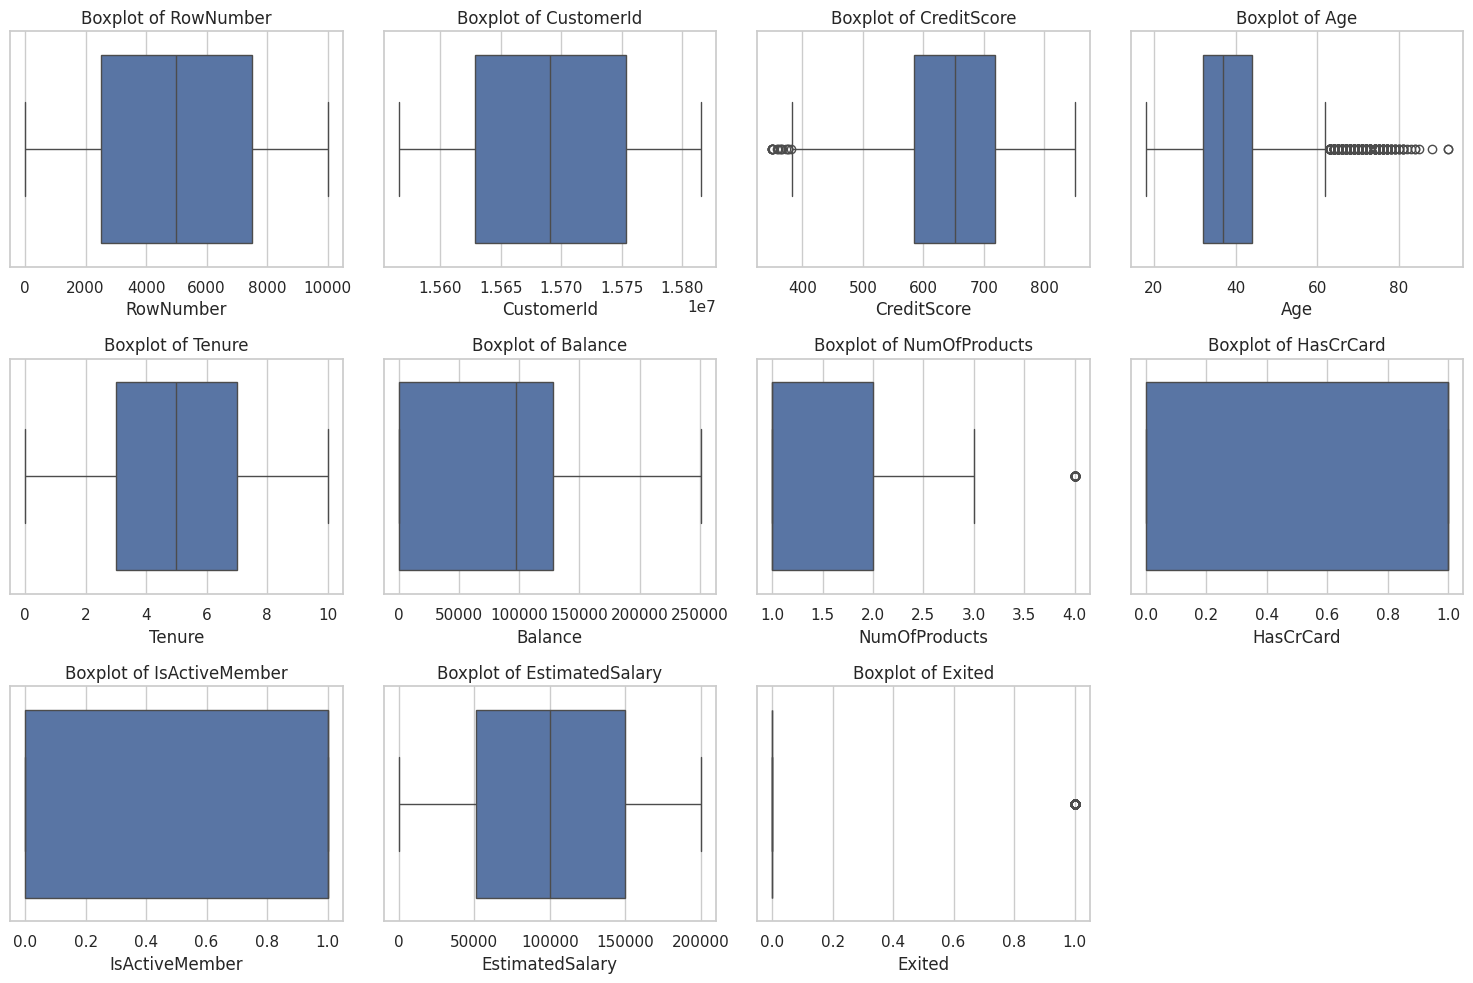

In [27]:
# Select only numerical columns for boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set up the plot size
plt.figure(figsize=(15, 10))

# Create a boxplot for each numerical column
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 4, i)  # Create a 3x4 grid of subplots
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [28]:
outlier_columns = ['Age', 'NumOfProducts', 'CreditScore']

# Function to remove outliers using IQR method
def remove_outliers(data, column):
    # Calculate the 25th and 75th percentiles
    percentile_25 = data[column].quantile(0.25)
    percentile_75 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    iqr = percentile_75 - percentile_25

    # Define the upper and lower bounds for detecting outliers
    upper_limit = percentile_75 + 1.5 * iqr
    lower_limit = percentile_25 - 1.5 * iqr

    # Filter out the rows where the column values are outside the limits
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Apply the outlier removal function to each specified column
for column in outlier_columns:
    df = remove_outliers(df, column)

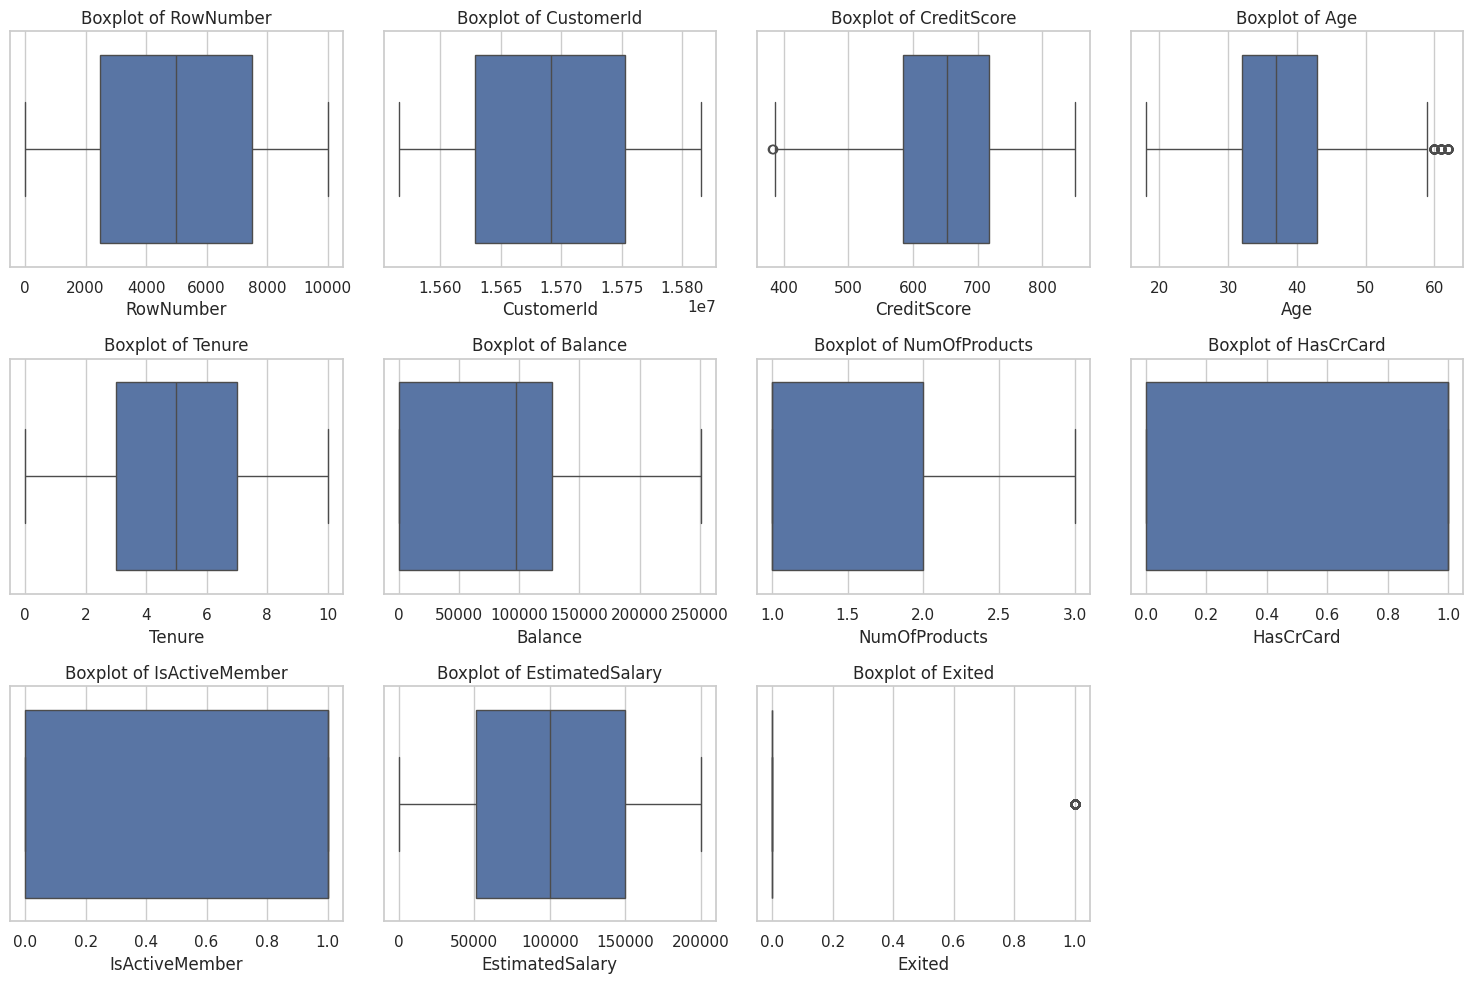

In [29]:
# Select only numerical columns for boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Set up the plot size
plt.figure(figsize=(15, 10))

# Create a boxplot for each numerical column
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 4, i)  # Create a 3x4 grid of subplots
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

# **Encode**

In [31]:

# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Display the updated DataFrame with encoded columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# **scale**

In [32]:
df = df.drop(columns=['CustomerId', 'Surname', 'RowNumber'])

# Display the updated DataFrame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [33]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select columns to scale (excluding 'Exited' as it's the target)
columns_to_scale = ['Age', 'CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled data
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.506410,0,0,0.545455,0.2,0.000000,0.0,1,1,0.506735,1
1,0.482906,2,0,0.522727,0.1,0.334031,0.0,0,1,0.562709,0
2,0.256410,0,0,0.545455,0.8,0.636357,1.0,1,0,0.569654,1
3,0.677350,0,0,0.477273,0.1,0.000000,0.5,0,0,0.469120,0
4,1.000000,2,0,0.568182,0.2,0.500246,0.0,1,1,0.395400,0


# **split the data**

In [34]:
# Define features (X) and target (y)
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7655, 10), (1914, 10), (7655,), (1914,))

# **models before smote**

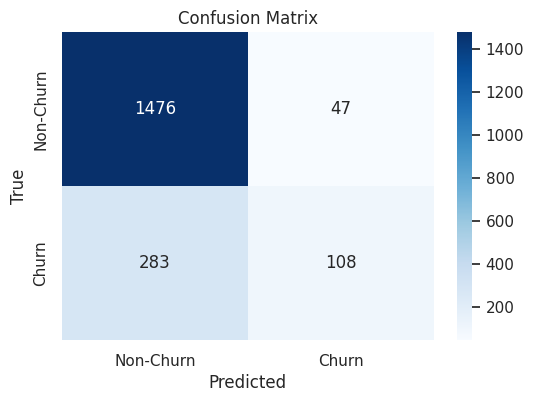

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1523
           1       0.70      0.28      0.40       391

    accuracy                           0.83      1914
   macro avg       0.77      0.62      0.65      1914
weighted avg       0.81      0.83      0.80      1914



In [36]:
# Initialize Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))

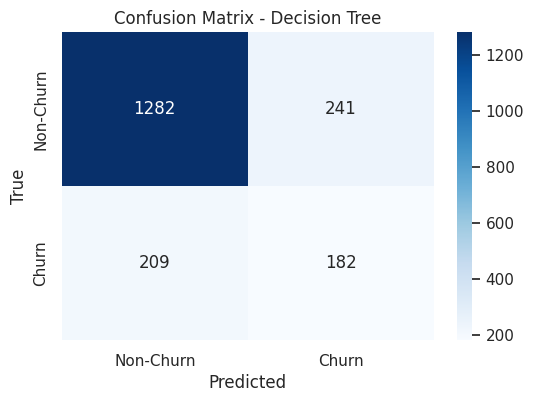

Classification Report - Decision Tree:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1523
           1       0.43      0.47      0.45       391

    accuracy                           0.76      1914
   macro avg       0.65      0.65      0.65      1914
weighted avg       0.77      0.76      0.77      1914



In [40]:
# Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Confusion Matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report - Decision Tree:\n', classification_report(y_test, y_pred_dtree))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


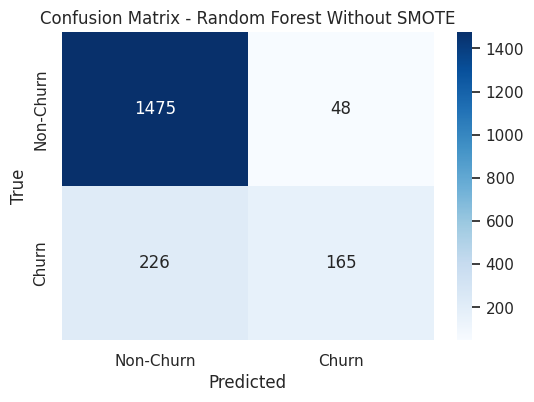

Classification Report - Random Forest Without SMOTE:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1523
           1       0.77      0.42      0.55       391

    accuracy                           0.86      1914
   macro avg       0.82      0.70      0.73      1914
weighted avg       0.85      0.86      0.84      1914



In [43]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fit model
random_search_rf.fit(X_train, y_train)

# Best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search_rf.best_params_)

# Predictions
y_pred_rf = random_search_rf.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest Without SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report - Random Forest Without SMOTE:\n', classification_report(y_test, y_pred_rf))

# **models after smote**

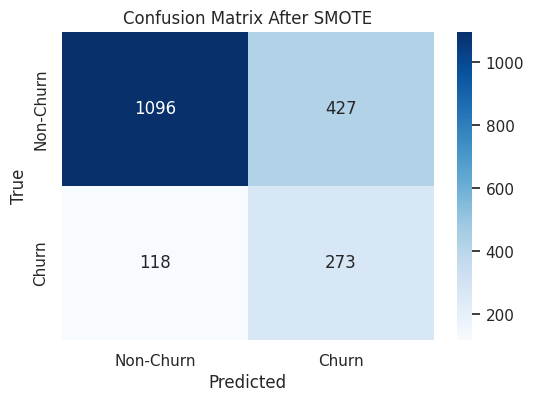

Classification Report After SMOTE:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1523
           1       0.39      0.70      0.50       391

    accuracy                           0.72      1914
   macro avg       0.65      0.71      0.65      1914
weighted avg       0.80      0.72      0.74      1914



In [37]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the SMOTE data
logreg.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
y_pred_smote = logreg.predict(X_test)

# Confusion Matrix after SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)

# Plot confusion matrix after SMOTE
plt.figure(figsize=(6, 4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix After SMOTE')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report after SMOTE
print('Classification Report After SMOTE:\n', classification_report(y_test, y_pred_smote))

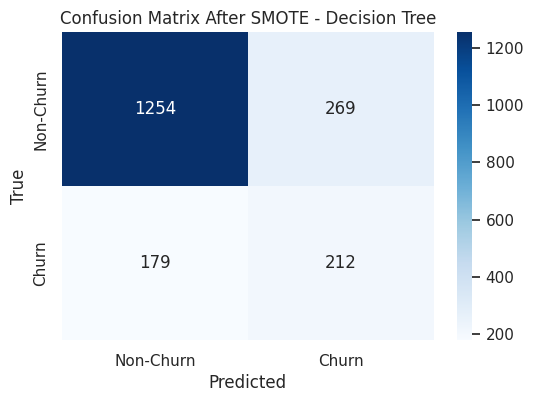

Classification Report After SMOTE - Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      1523
           1       0.44      0.54      0.49       391

    accuracy                           0.77      1914
   macro avg       0.66      0.68      0.67      1914
weighted avg       0.79      0.77      0.77      1914



In [41]:
# Apply SMOTE to the training data
X_train_smote_dtree, y_train_smote_dtree = smote.fit_resample(X_train, y_train)

# Train the Decision Tree model on the SMOTE data
dtree.fit(X_train_smote_dtree, y_train_smote_dtree)

# Make predictions on the test data
y_pred_smote_dtree = dtree.predict(X_test)

# Confusion Matrix after SMOTE
cm_smote_dtree = confusion_matrix(y_test, y_pred_smote_dtree)

# Plot confusion matrix after SMOTE
plt.figure(figsize=(6, 4))
sns.heatmap(cm_smote_dtree, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix After SMOTE - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report after SMOTE
print('Classification Report After SMOTE - Decision Tree:\n', classification_report(y_test, y_pred_smote_dtree))

Best Parameters After SMOTE: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


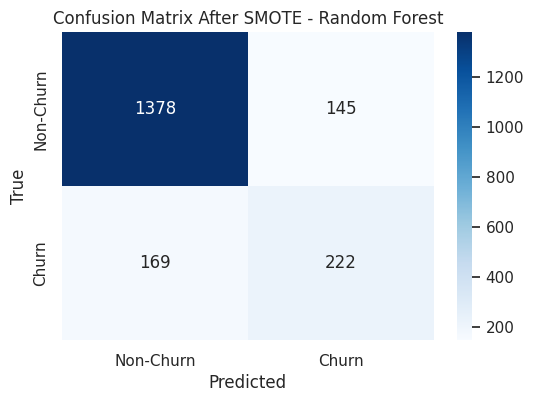

Classification Report After SMOTE - Random Forest:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1523
           1       0.60      0.57      0.59       391

    accuracy                           0.84      1914
   macro avg       0.75      0.74      0.74      1914
weighted avg       0.83      0.84      0.83      1914



In [44]:
# Apply SMOTE to the training data
X_train_smote_rf, y_train_smote_rf = smote.fit_resample(X_train, y_train)

# Initialize Random Forest Classifier
rf_smote = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search_rf_smote = RandomizedSearchCV(rf_smote, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fit model with SMOTE data
random_search_rf_smote.fit(X_train_smote_rf, y_train_smote_rf)

# Best parameters found by RandomizedSearchCV with SMOTE
print("Best Parameters After SMOTE:", random_search_rf_smote.best_params_)

# Predictions
y_pred_rf_smote = random_search_rf_smote.predict(X_test)

# Confusion Matrix
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

# Plot confusion matrix after SMOTE
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix After SMOTE - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report after SMOTE
print('Classification Report After SMOTE - Random Forest:\n', classification_report(y_test, y_pred_rf_smote))


# **ensemble models**

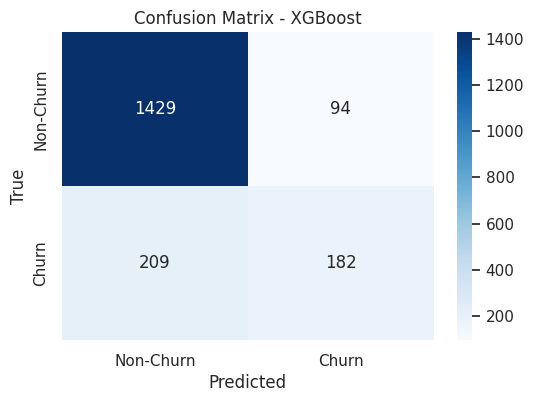

Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1523
           1       0.66      0.47      0.55       391

    accuracy                           0.84      1914
   macro avg       0.77      0.70      0.72      1914
weighted avg       0.83      0.84      0.83      1914



In [47]:
# 2. Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# 3. Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate the XGBoost model
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report - XGBoost:\n', classification_report(y_test, y_pred_xgb))

**best model is random forest with accuracy 86% no smote**